# SVM (Tartó vektor gépek)

In [1]:
import time
import warnings
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap

warnings.filterwarnings("ignore")

## Vizualizációhoz szükséges metódusok

In [4]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

# Függvény döntési határok kirajzolására
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # jelölő generálás és színtérkép
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # a döntési sík ábrázolása
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # teszt adatok kiemelése
    if test_idx:
        # minden mintaegyed kiemelése
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(
            x = X_test[:, 0],
            y = X_test[:, 1],
            c = '',
            alpha = 1.0,
            linewidths = 1,
            marker = 'o',
            s = 55, 
            label = 'test set'
        )

## Adatok generálása

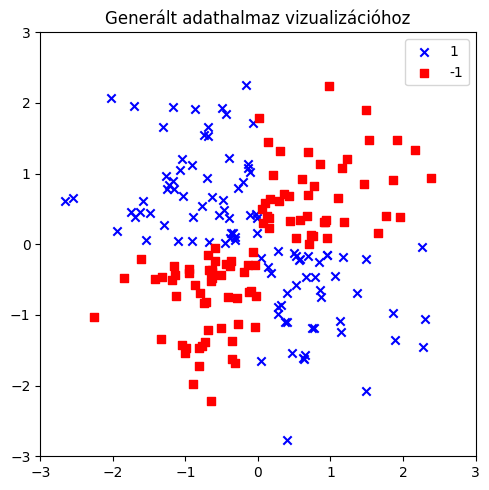

In [5]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.figure(figsize=(5, 5))
plt.title("Generált adathalmaz vizualizációhoz")
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## SVM lineáris kernellel

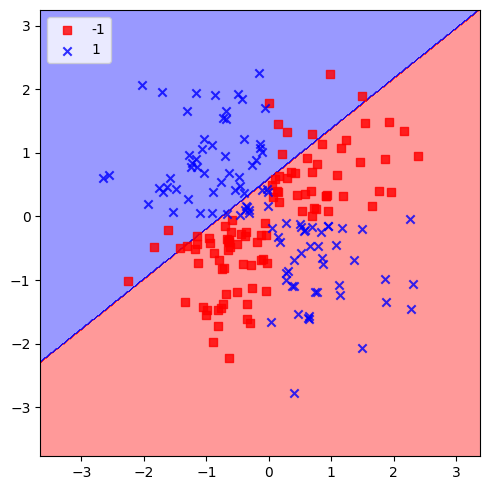

In [6]:
svm = SVC(kernel='linear', C=1, random_state=0)
# Az osztályozó tanítása
svm.fit(X_xor, y_xor)

# Döntési határok vizualizálása
plt.figure(figsize=(5, 5))
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## SVM RBF kernellel

In [20]:
def train_RBF_SVM(g_, c_):
    svm = SVC(kernel='rbf', random_state=0, gamma=g_, C=c_)
    # Az osztályozó tanítása
    svm.fit(X_xor, y_xor)
    
    # Döntési határok kirajzolása
    plt.figure(figsize=(5, 5))
    plot_decision_regions(X_xor, y_xor, classifier=svm)
    plt.legend(loc='upper left')
    plt.title(f"$\gamma={g_}; C={c_}$")
    plt.tight_layout() 
    plt.show()

### $\gamma=0.1$

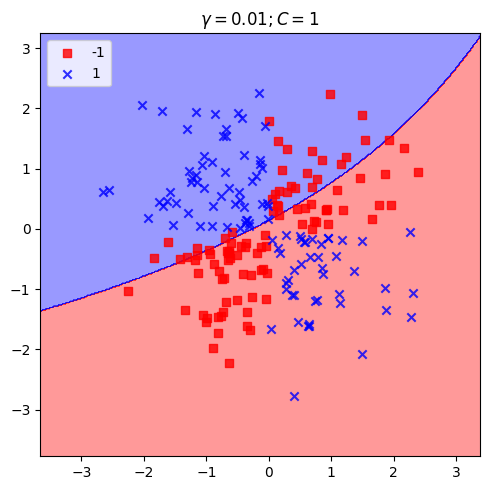

In [21]:
train_RBF_SVM(0.01, 1)

### $\gamma=1$

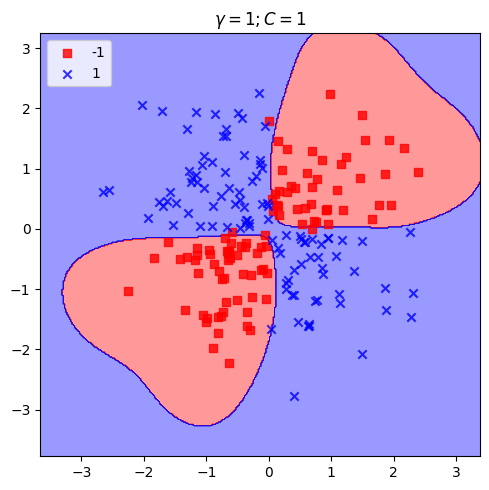

In [22]:
train_RBF_SVM(1, 1)

### $\gamma=10$

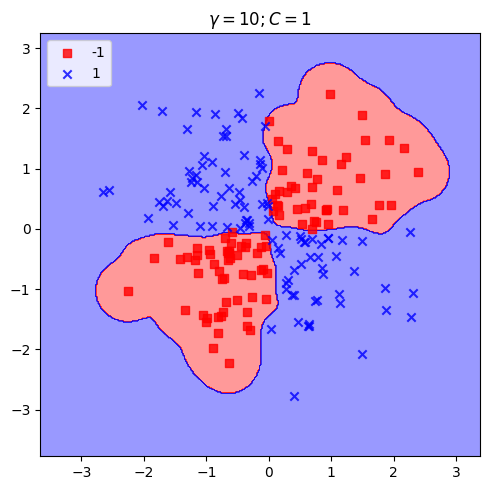

In [23]:
train_RBF_SVM(10, 1)

### $\gamma=100$

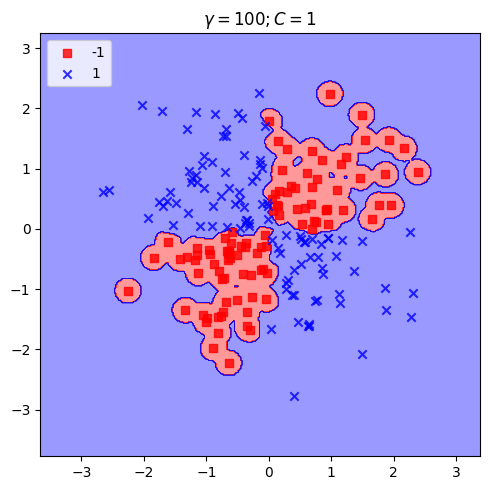

In [24]:
train_RBF_SVM(100, 1)

### $C=1$

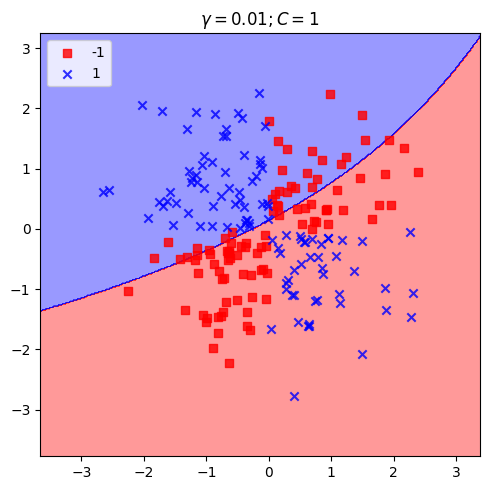

In [25]:
train_RBF_SVM(0.01, 1)

### $\gamma=10$

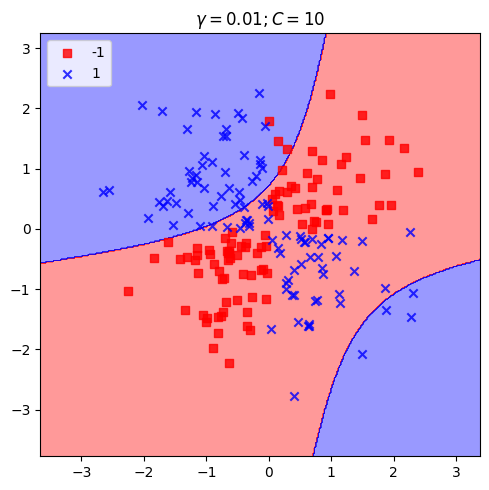

In [26]:
train_RBF_SVM(0.01, 10)

### $\gamma=1000$

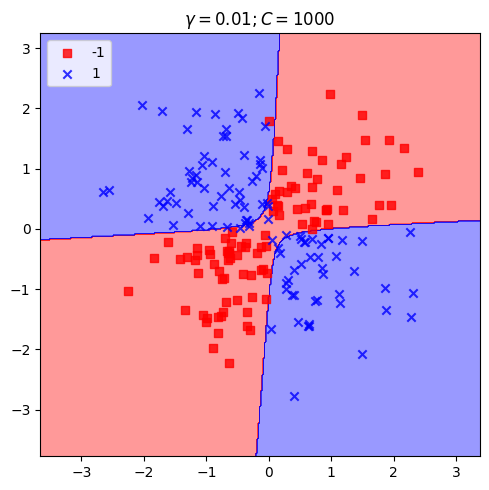

In [27]:
train_RBF_SVM(0.01, 1000)

### $\gamma=10000$

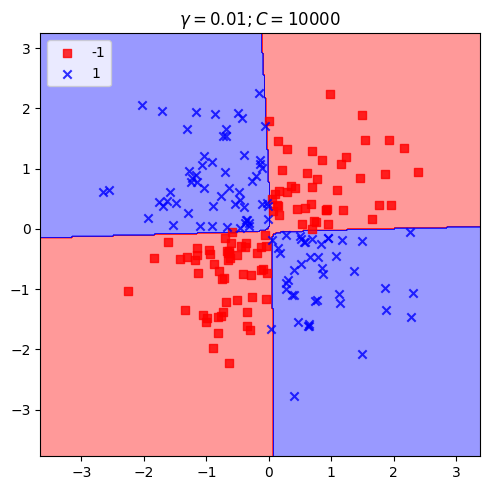

In [28]:
train_RBF_SVM(0.01, 10000)

### $\gamma=100000$

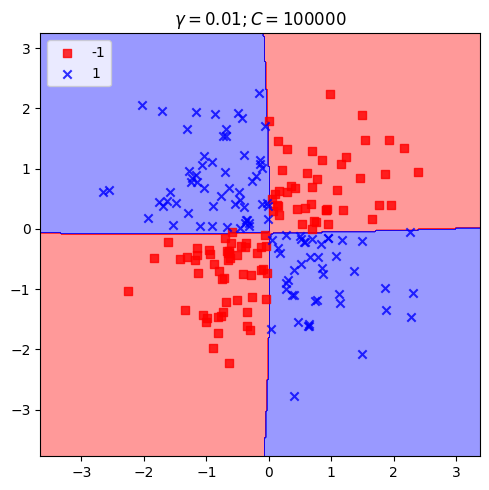

In [29]:
train_RBF_SVM(0.01, 100000)

## Tanítás időtartama
### Adathalmaz generálása

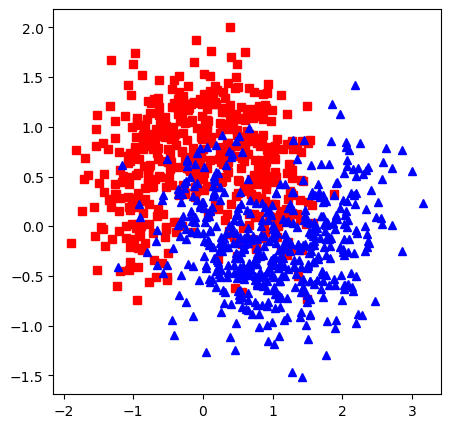

In [31]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
plt.figure(figsize=(5, 5))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "rs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b^")
plt.show()

### Tolerancia szerinti tanítási idő vizsgálata

[LibSVM]......................................
*.......................
*..............................................................
*...................................*.......................................................*
optimization finished, #iter = 212105
obj = -4447.997680, rho = 0.075931
nSV = 449, nBSV = 441
Total nSV = 449
0 0.1 0.1248326301574707
[LibSVM]................................................*..........................................................*..............*..............................................................*..................................................................*...........*
optimization finished, #iter = 258151
obj = -4448.479655, rho = 0.058653
nSV = 446, nBSV = 441
Total nSV = 446
1 0.01 0.11629438400268555
[LibSVM]...................................................*......*............................................................*..............................................................................*...............

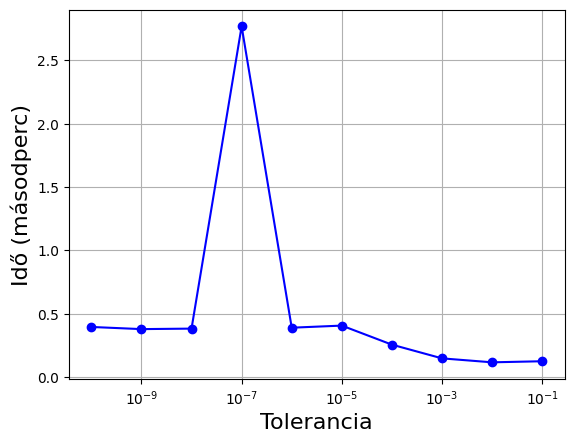

In [32]:
# Tolerancia: kilépési kritérium: mennyi margósértés engedélyezett
tol = 0.1
tols = []
times = []
for i in range(10):
    svm_clf = SVC(kernel="poly", gamma=3, C=10, tol=tol, verbose=1)
    t1 = time.time()
    svm_clf.fit(X, y)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(i, tol, t2-t1)
    tol /= 10
plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerancia", fontsize=16)
plt.ylabel("Idő (másodperc)", fontsize=16)
plt.grid(True)
plt.show()

### Eredmények

[LibSVM]*..............................
*............
*.....................
*...............
*.......
*.
*
optimization finished, #iter = 83146
obj = -4410.715489, rho = 0.117467
nSV = 452, nBSV = 435
Total nSV = 452


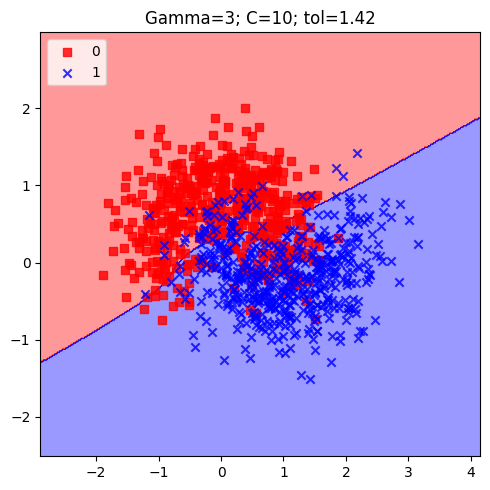

In [34]:
tol = 1.42
gm = 3
c_ = 10
svm_clf = SVC(kernel="poly", gamma=gm, C=c_, tol=tol, verbose=1)
svm_clf.fit(X, y)

plt.figure(figsize=(5, 5))
plot_decision_regions(X, y, classifier=svm_clf)
plt.legend(loc='upper left')
plt.title("Gamma="+str(gm)+"; C="+str(c_)+"; tol="+str(tol))
plt.tight_layout() 
plt.show()